In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression

path = "/home/arkalibaig/load_jl/hunza_weather_25years.csv"
df= pd.read_csv(path)
df.head(40)


,date,max_temperature_celsius,min_temperature_celsius,average_temperature_celsius,feels_like_max_celsius,feels_like_min_celsius,total_precipitation_mm,rainfall_mm,snowfall_cm,hours_of_precipitation,...,sunset_time,sunshine_duration_seconds,daylight_duration_seconds,max_wind_speed_kmh,max_wind_gust_kmh,wind_direction_degrees,solar_radiation_MJ_per_m2,water_evaporation_mm,sunshine_hours,daylight_hours
0,2000-01-01,-2.7,-13.5,-9.2,-6.1,-17.8,0.0,0.0,0.00,0.0,...,2000-01-01T16:56,31572.68,35020.06,3.8,28.4,77,13.06,1.12,8.770189,9.727794
1,2000-01-02,-2.2,-13.3,-8.9,-5.6,-17.6,0.0,0.0,0.00,0.0,...,2000-01-02T16:57,31612.07,35055.47,3.3,26.6,80,13.12,1.15,8.781131,9.737631
2,2000-01-03,-2.7,-13.7,-9.3,-6.2,-18.1,0.0,0.0,0.00,0.0,...,2000-01-03T16:57,31655.28,35094.37,3.8,25.9,79,13.24,1.13,8.793133,9.748436
3,2000-01-04,-2.1,-13.6,-9.1,-5.5,-17.9,0.0,0.0,0.00,0.0,...,2000-01-04T16:58,31702.19,35136.65,3.8,26.3,80,13.33,1.17,8.806164,9.760181
4,2000-01-05,-2.1,-13.2,-9.0,-5.5,-17.6,0.0,0.0,0.00,0.0,...,2000-01-05T16:59,31752.70,35182.23,3.7,25.9,81,13.31,1.18,8.820194,9.772842
5,2000-01-06,-0.6,-13.1,-7.7,-3.8,-17.3,0.0,0.0,0.00,0.0,...,2000-01-06T17:00,31806.69,35231.00,3.3,26.6,87,12.73,1.19,8.835192,9.786389
6,2000-01-07,-0.3,-12.0,-7.5,-3.3,-16.2,0.0,0.0,0.28,0.0,...,2000-01-07T17:01,30404.32,35282.88,3.3,31.0,91,9.85,0.97,8.445644,9.800800
7,2000-01-08,-0.2,-10.1,-5.3,-2.9,-14.0,3.4,0.0,2.45,21.0,...,2000-01-08T17:02,28251.22,35337.75,3.0,45.7,117,8.51,0.89,7.847561,9.816042
8,2000-01-09,-0.1,-4.3,-2.4,-2.9,-7.5,5.5,0.0,3.92,23.0,...,2000-01-09T17:03,25671.27,35395.52,2.5,62.6,155,9.31,1.00,7.130908,9.832089
9,2000-01-10,-2.4,-11.6,-6.1,-5.2,-15.6,1.3,0.0,0.98,6.0,...,2000-01-10T17:04,30949.26,35456.08,2.9,41.0,124,11.86,1.12,8.597017,9.848911


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9477 entries, 0 to 9476
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         9477 non-null   object 
 1   max_temperature_celsius      9477 non-null   float64
 2   min_temperature_celsius      9477 non-null   float64
 3   average_temperature_celsius  9477 non-null   float64
 4   feels_like_max_celsius       9477 non-null   float64
 5   feels_like_min_celsius       9477 non-null   float64
 6   total_precipitation_mm       9477 non-null   float64
 7   rainfall_mm                  9477 non-null   float64
 8   snowfall_cm                  9477 non-null   float64
 9   hours_of_precipitation       9477 non-null   float64
 10  weather_condition_code       9477 non-null   int64  
 11  sunrise_time                 9477 non-null   object 
 12  sunset_time                  9477 non-null   object 
 13  sunshine_duration_

In [7]:
max_0 = df["average_temperature_celsius"].max()
mean_0= df["average_temperature_celsius"].mean()
print(f"Avg temp Max: {max_0:}, \nAvg temp Mean: {mean_0}")
max_1 =  df["max_temperature_celsius"].max()
mean_1=df["max_temperature_celsius"].mean()
print(f"Max1mum temp Max: {max_1}, \nMax1mum temp Mean: {mean_1}")

Avg temp Max: 28.7, 
Avg temp Mean: 4.037997256515775
Max1mum temp Max: 34.3, 
Max1mum temp Mean: 8.399588477366256


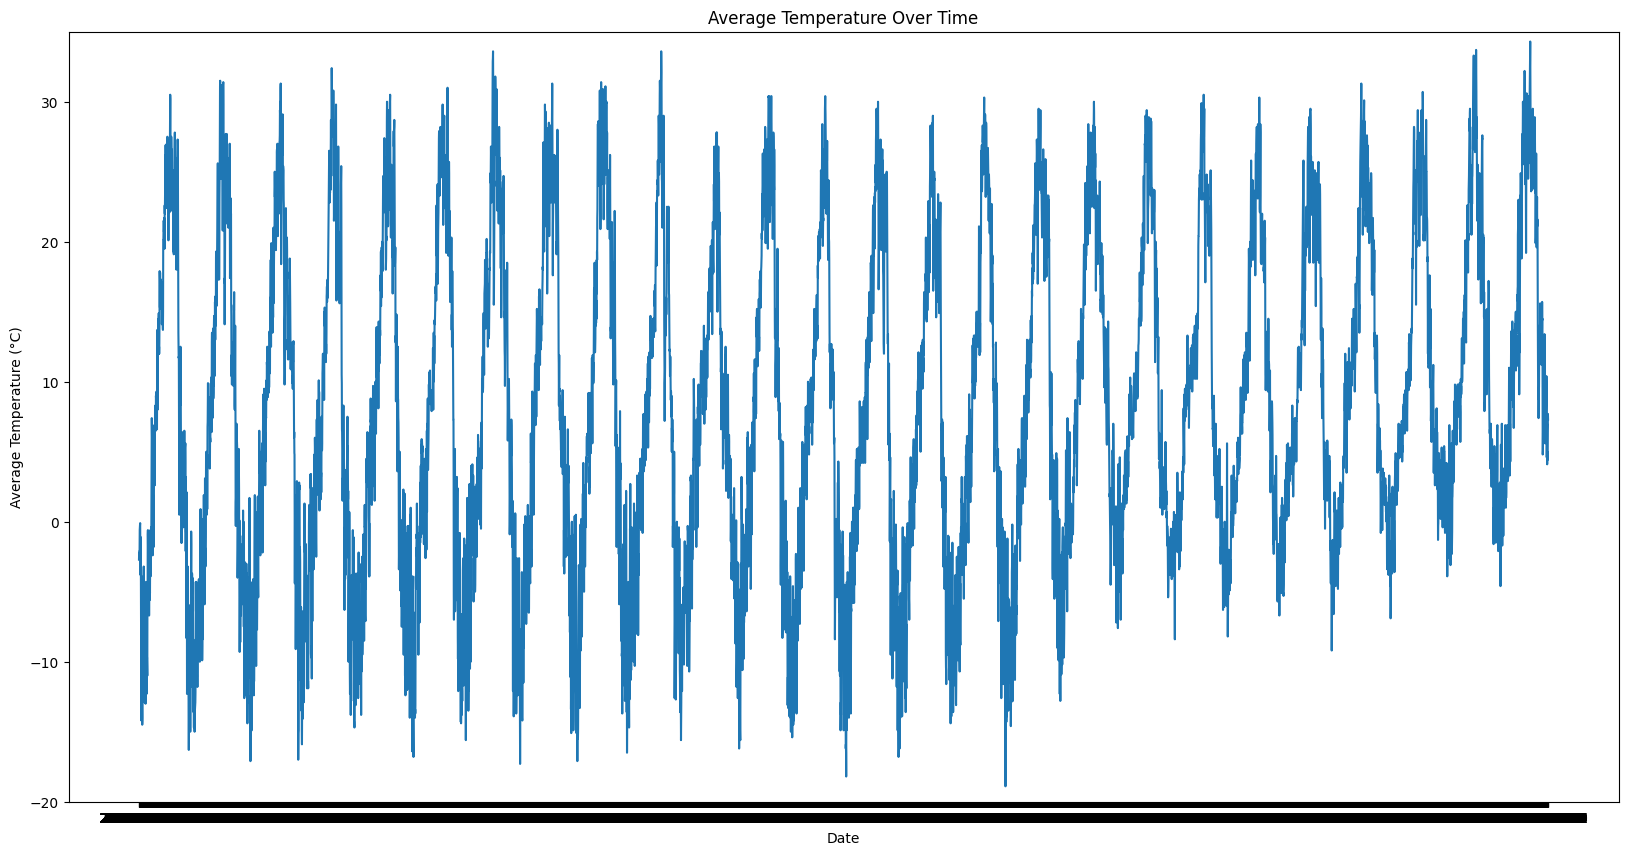

In [8]:
plt.figure(figsize=(20,10))
plt.plot(df['date'], df['max_temperature_celsius'])
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature Over Time')
plt.ylim(-20, 35)  
plt.show()

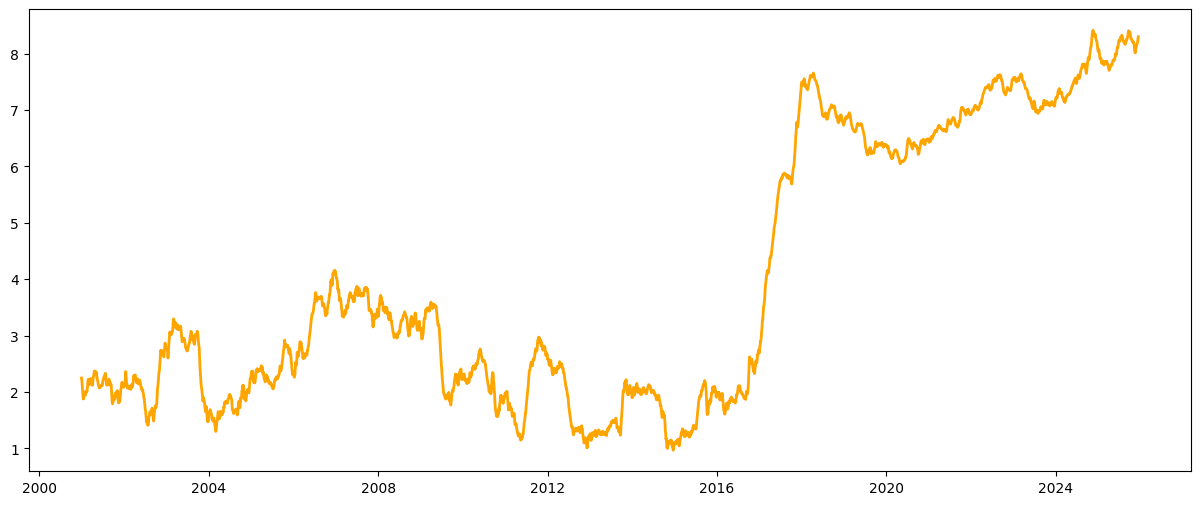

<Figure size 3000x1000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [11]:
#365-days moving average
df["Rolling"] = df["average_temperature_celsius"].rolling(window=365).mean()

plt.figure(figsize=(15,6))
plt.plot(df["date"], df["Rolling"], color="orange", linewidth=2)
plt.figure(figsize=(30,10))
plt.show()

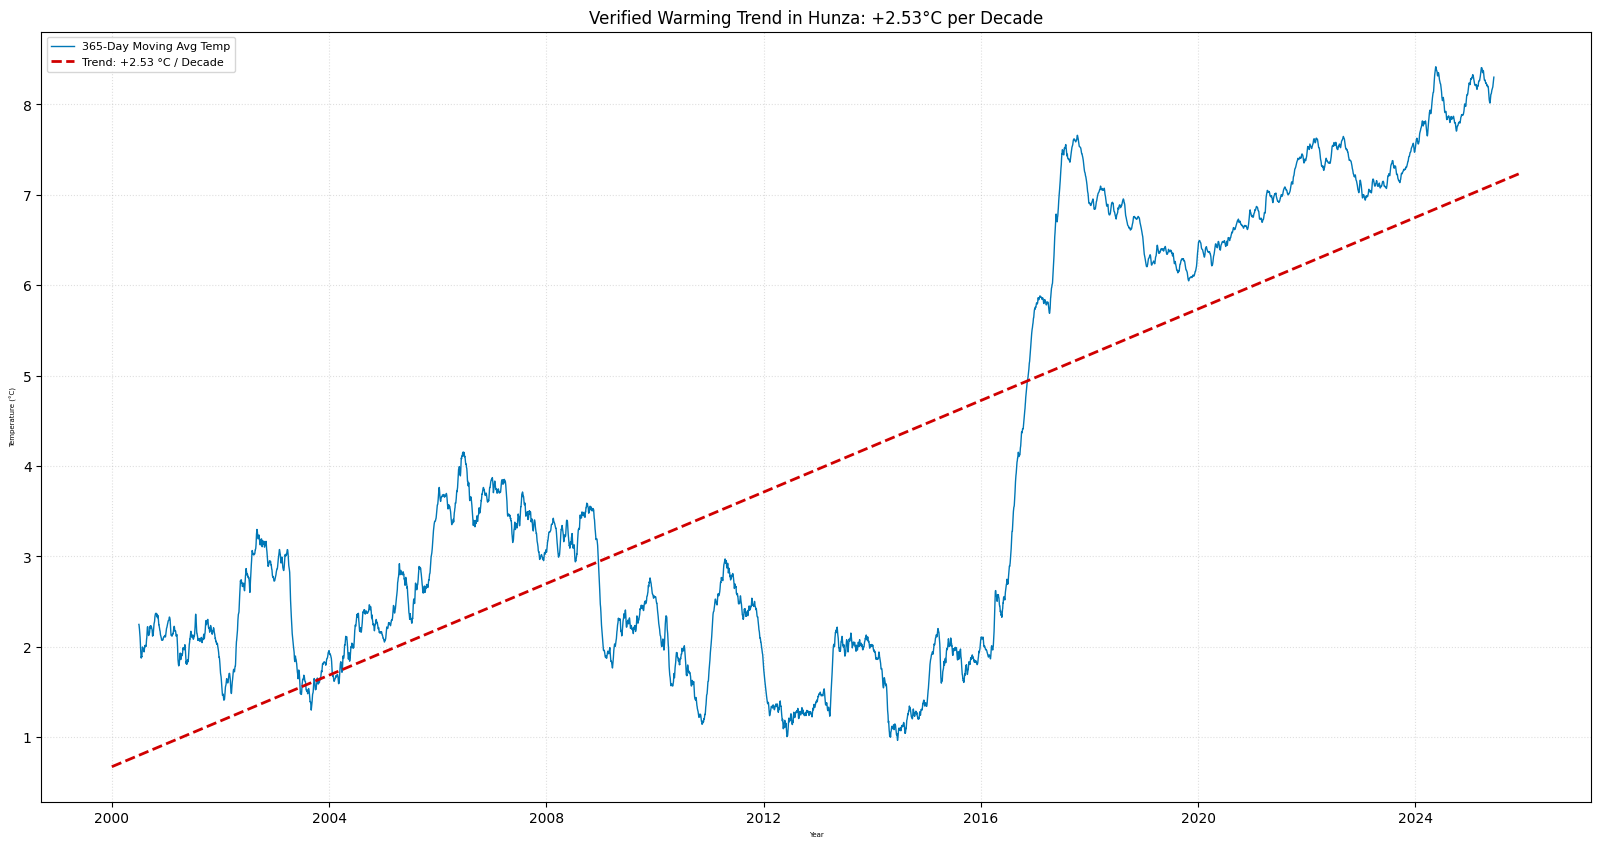

Mathematical Result: 2.532 °C per decade


In [43]:
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")
df["Rolling"] = df["average_temperature_celsius"].rolling(window=365, center=True).mean()
df_clean = df.dropna(subset=["Rolling"]).copy()
df_clean["DateOrdinal"] = df_clean["date"].map(pd.Timestamp.toordinal)

X = df_clean[["DateOrdinal"]]
y = df_clean["Rolling"]

model = LinearRegression()
model.fit(X, y)

df["DateOrdinal"] = df["date"].map(pd.Timestamp.toordinal) 
df["Trend"] = model.predict(df[["DateOrdinal"]])

#change per decade
slope_per_day = model.coef_[0]
change_per_decade = slope_per_day * 365.25 * 10


plt.figure(figsize=(20, 10), facecolor='white')
plt.plot(df["date"], df["Rolling"], color='#0077b6', linewidth=1, label="365-Day Moving Avg Temp")
plt.plot(df["date"], df["Trend"], color="#d00000", linestyle='--', linewidth=2, 
         label=f"Trend: +{change_per_decade:.2f} °C / Decade")
plt.xlabel("Year", fontsize=5)
plt.ylabel("Temperature (°C)", fontsize=5)
plt.title(f"Verified Warming Trend in Hunza: +{change_per_decade:.2f}°C per Decade", fontsize=12 )
plt.grid(True, linestyle=':', alpha=0.4)
plt.legend(fontsize=8)
plt.show()

print(f"Mathematical Result: {change_per_decade:.3f} °C per decade")

In [88]:
#before and after 2016 mean.  
df["date"] = pd.to_datetime(df["date"])
df_early = df[(df["date"].dt.year >= 2000) & (df["date"].dt.year <= 2015)]
df_late = df[(df["date"].dt.year >= 2016) & (df["date"].dt.year <= 2025)]
early_mean = df_early["average_temperature_celsius"].mean()
late_mean = df_late["average_temperature_celsius"].mean()

print(f"Early period mean (2000-2015): {early_mean:.2f}°C")
print(f"Late period mean (2016-2025): {late_mean:.2f}°C")
print(f"Total increase in baseline: {late_mean - early_mean:.2f}°C")

Early period mean (2000-2015): 2.30°C
Late period mean (2016-2025): 6.84°C
Total increase in baseline: 4.54°C


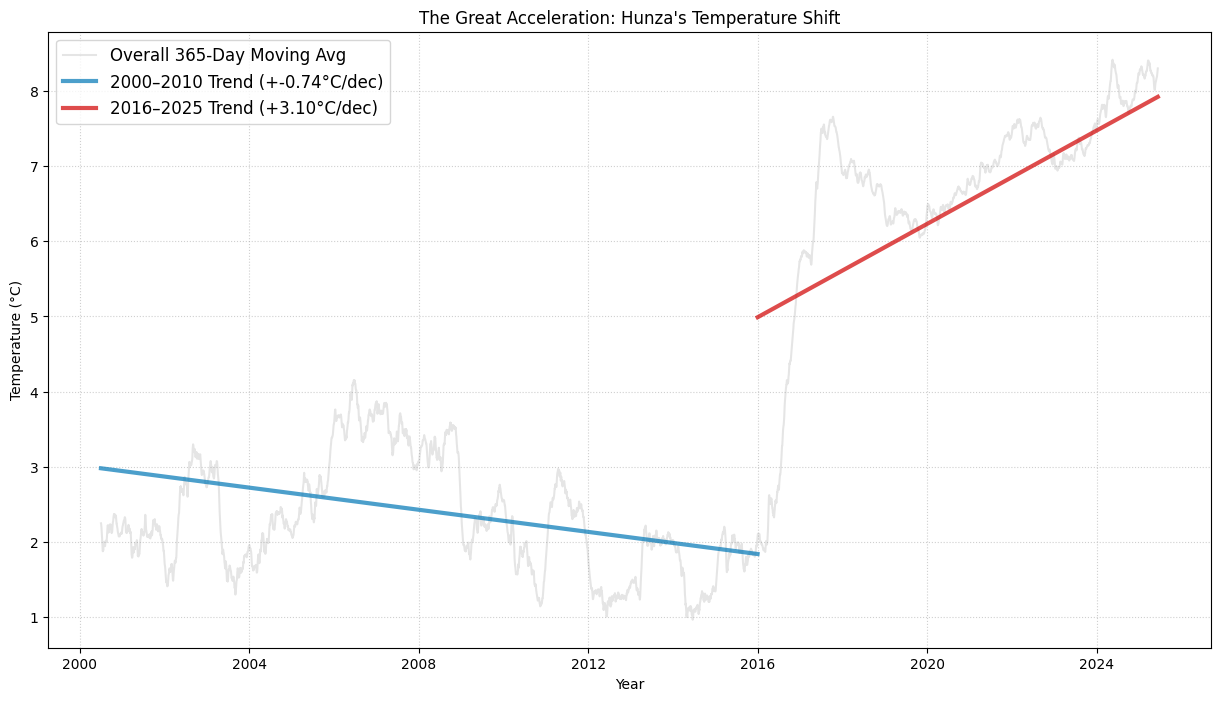

Early Period (2000-2015) Speed: -0.74°C per decade
Late Period (2016-2025) Speed: 3.10°C per decade
Total Mean Shift Found Earlier: 4.54°C


In [85]:
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")
df["Rolling"] = df["average_temperature_celsius"].rolling(window=365, center=True).mean()
df["DateOrdinal"] = df["date"].map(pd.Timestamp.toordinal)

#proper copies of the slices
df_early = df[(df["date"].dt.year >= 2000) & (df["date"].dt.year <= 2015)].copy()
df_late = df[(df["date"].dt.year >= 2016) & (df["date"].dt.year <= 2025)].copy()

# Drop NaN values
df_early = df_early.dropna(subset=["Rolling"])
df_late = df_late.dropna(subset=["Rolling"])

plt.figure(figsize=(15, 8), facecolor='white')

#early trendline
X_early = df_early[["DateOrdinal"]]
y_early = df_early["average_temperature_celsius"]
model_early = LinearRegression().fit(X_early, y_early)
df_early["Trend"] = model_early.predict(X_early)
slope_early = model_early.coef_[0] * 365.25 * 10

# late trendline
X_late = df_late[["DateOrdinal"]]
y_late = df_late["average_temperature_celsius"]
model_late = LinearRegression().fit(X_late, y_late)
df_late["Trend"] = model_late.predict(X_late)
slope_late = model_late.coef_[0] * 365.25 * 10

plt.plot(df["date"], df["Rolling"], color='gray', alpha=0.2, label="Overall 365-Day Moving Avg")
plt.plot(df_early["date"], df_early["Trend"], label=f"2000–2010 Trend (+{slope_early:.2f}°C/dec)", color="#0077b6", linewidth=3, alpha=0.7)
plt.plot(df_late["date"], df_late["Trend"], label=f"2016–2025 Trend (+{slope_late:.2f}°C/dec)", color="#d00000", linewidth=3, alpha=0.7)

plt.title("The Great Acceleration: Hunza's Temperature Shift", fontsize=12)
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, linestyle=':', alpha=0.6)

plt.show()

print(f"Early Period (2000-2015) Speed: {slope_early:.2f}°C per decade")
print(f"Late Period (2016-2025) Speed: {slope_late:.2f}°C per decade")
print(f"Total Mean Shift Found Earlier: 4.54°C")